# Random Forest

In [1]:
import pandas as pd
import os
import sys
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Datasets/UNSW_2015/UNSW_NB15_testing-set.csv')
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [3]:
df.shape

(175341, 45)

In [4]:
x_train = df.drop(['attack_cat','label','proto','service','state','id'], axis =1)
x_train.shape

(175341, 39)

In [5]:
y_train = df['label']
y_train.shape

(175341,)

In [6]:
y_train.value_counts()

1    119341
0     56000
Name: label, dtype: int64

In [7]:
forest = RandomForestClassifier(random_state = 0)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [8]:
import time

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.065 seconds


In [9]:
importances

array([2.38474588e-02, 1.04746193e-02, 2.26756969e-02, 3.25616578e-02,
       2.31042106e-02, 5.36301568e-02, 1.82690260e-01, 5.67921670e-02,
       3.04156761e-02, 4.28559229e-02, 8.17050813e-03, 9.85256950e-03,
       1.89285121e-02, 3.00652634e-02, 1.49976859e-02, 9.89679762e-03,
       4.84599756e-03, 7.19617041e-03, 8.44155962e-03, 3.13295407e-04,
       4.39881069e-02, 1.55773891e-02, 2.73305817e-02, 2.49912890e-02,
       3.30277727e-02, 1.81028251e-03, 1.67785023e-03, 2.19014533e-02,
       1.45277938e-01, 1.14886057e-02, 7.94762331e-03, 9.29475575e-03,
       2.28827941e-02, 1.01628938e-04, 9.31608288e-05, 1.88272602e-03,
       7.90167229e-03, 2.55128732e-02, 5.55531084e-03])

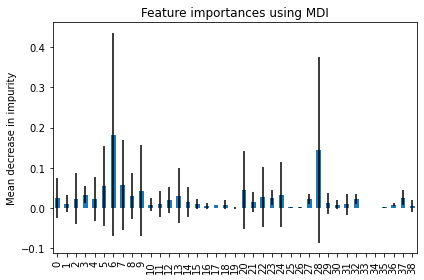

In [10]:
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [11]:
## import test data

df_test = pd.read_csv('./data set/UNSW_NB15_training-set.csv')
df_test.shape

(82332, 45)

In [12]:
df_test.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [13]:
x_test = df_test.drop(['attack_cat','label','proto','service','state','id'], axis =1)
x_test.shape

(82332, 39)

In [14]:
y_test = df_test['label']
y_test.shape

(82332,)

In [15]:
y_pred = forest.predict(x_test)
y_pred.shape

(82332,)

In [16]:
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.8948253428085278
0.8723704027595589


#  Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
gnb = GaussianNB()

In [19]:
gnb.fit(x_train, y_train)

GaussianNB()

y_pred = gnb.predict(x_test)
y_pred.shape

In [20]:
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.8948253428085278
0.8723704027595589


#  KNN 

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [22]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred.shape

(82332,)

In [23]:
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.8276241919431051
0.78332847495506


# Support Vector Classifier

In [ ]:
import pandas as pd
import os
import sys
import numpy as np
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
x = pre_df.iloc[:, :-1]
y = pre_df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC

clf = SVC().fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(f1_score(y_test, y_pred, average='macro'))
print(accuracy_score(y_test, y_pred))

precision = precision_score(y_test, y_pred, average='macro')#, pos_label=0)
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred, average='macro')#, pos_label=0)
print('Recall: %.3f' % recall)